# HW 6

This assignment covers several aspects of Logistic Regresstion & KNN Classifier. 
**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**

  * **Q** - QUESTION
  * **A** - Where to input your answer

## Instructions

Keep the following in mind for all notebooks you develop:
* Structure your notebook. 
* Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
* Make sure your notebook can always be rerun from top to bottom.
* Please start working on this assignment as soon as possible. If you are a beginner in Python this might take a long time. One of the objectives of this assignment is to help you learn python and scikit-learn package. 
* See [README.md](README.md) for homework submission instructions

## Related Tutorials
    
* [Logistic Regression with Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

* [LDA with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

* [QDA Classifier](https://scikit-learn.org/stable/modules/lda_qda.html)

* [QDA with Sklearn](https://scikit-learn.org/0.15/modules/generated/sklearn.qda.QDA.html)

* [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)

# Data Processing

**Data** 
* Get the exploratory data and the folowing files from [link](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)
* Save metadata and the original data from download [Link](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) to your local HW folder. 
* If you are using command line, the commands are:  
```
>> wget https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data
>> wget https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.names
``` 
* wget instructions: 
  * dowload it from [link](https://eternallybored.org/misc/wget/) 
  * follow [steps](https://stackoverflow.com/questions/29113456/wget-not-recognized-as-internal-or-external-command)

**Q1** Get training data from the dataframe
1. Load transfusion.data into data frame
2. Rename the column ```whether he/she donated blood in March 2007``` to ```donation_stat```
3. Assign values of ```donation_stat``` column to ```y```, note you have to use ```.values``` method
4. Drop 'donation_stat' column from data frame,
5. Assign df values to x
6. Split dataset into train and test data use train_test_split with test_size = 0.2 and random_state = 1
   * you will use this split to train **ALL** three models

**A1** Replace ??? with code in the code cell below

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Read the transfusion.data file using the apropriate separator as input to read_csv()
df = pd.read_csv("transfusion.data")
df.head()

# Assign values of ```donation_stat``` column to y, note you have to use .values method
df.rename(columns={"whether he/she donated blood in March 2007": "donation_stat"}, inplace=True)
y = df.donation_stat.values
# Drop 'donation_stat' column from data frame,
df.drop(columns=['donation_stat'], inplace=True)
# Assign df values to x
x = df.values
# View shape of x and y
x.shape, y.shape

# Use stratify = y and test_size = 0.2 and random_state = 1
xtrain, xtest, ytrain, ytest = train_test_split(x,y, stratify=y, test_size= 0.2, random_state=1)

# Model 1: Logistic Regression
1. Apply Logistic Regression to blood transfusion dataset 
2. Show its classification accuracy using test-train splitting
3. Show its classification accuracy using K-fold cross validation

**Q2** Train Logistic Regression Model
1. Create a logistic regression model using sklearn library, ```(See the documenttaion for details)```
2. Fit the model with the train data 
3. Get the score from the model using test data
4. Plot Confusion Matrix using the previous HWs method

**A2** Replace ??? with code in the code cell below

<Figure size 432x288 with 0 Axes>

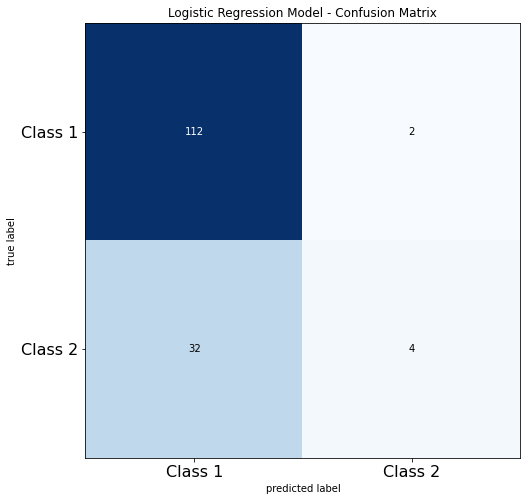

In [39]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# Create a logistic regression model using sklearn library
clf = LogisticRegression()
clf.fit(xtrain,ytrain)

#print score for test data
clf.score(x,y)

#predict y values for test data
ypred=clf.predict(xtest)

cm = confusion_matrix(ytest, ypred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.yticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.show()

**Q3** Train Logistic Regression Model using cross-validation 
* Now, use Kfold cross validation technique for the model evaluation.(```Use K=5``` or try using other number of folds to see what works best)

**A3** Replace ??? with code in the code cell below

In [3]:
from sklearn.model_selection import cross_val_score

# Use sklearn for 5 fold cross validation 
scores_log=cross_val_score(clf,x,y,cv=5)

# print the scores from different folds
print(scores_log)

[0.76       0.76       0.75333333 0.82550336 0.76510067]


# Model 2: Linear Discriminant Analysis
1. Apply LDA to blood transfusion dataset 
2. Show its classification accuracy using test-train splitting
3. Show its classification accuracy using K-fold cross validation

**Q4** Build a Linear Discriminant Model for the transfusion.data dataset
1. Create an LDA model for the transfusion.data dataset   
2. fit the LDA model on the train data
3. predict the values from test data
4. print out the score from test data  
**Note: Figure out the value of ```n_components``` for the transfusion.data**

**A4** Replace ??? with code in the code cell below

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# Define LDA model
lda = LDA(n_components=1)

#Fit LDA model on xtrain, ytrain from above  
lda.fit(xtrain,ytrain)

#predict y values from xtest from above
y_pred=lda.predict(xtest)

#Number of instances per class
print(np.unique(lda, return_counts=False))

#print score for test data
print(lda.score(xtest,ytest))

[LinearDiscriminantAnalysis(n_components=1)]
0.7733333333333333


**Q5** Train LDA using cross-validation. See A3 for guide and [sklearn.cross_validation](https://scikit-learn.org/stable/modules/cross_validation.html) tutorial.

**A5** Replace ??? with code in the code cell below

In [5]:
from sklearn.model_selection import cross_val_score

# Use sklearn for 5 fold cross validation 
scores_lda=cross_val_score(lda,x,y,cv=5)

# print the scores from different folds
print(scores_lda)

[0.82       0.76       0.75333333 0.80536913 0.76510067]


# Model 3: Quadratic Discriminant Analysis

1. Apply QDA to blood transfusion dataset 
2. Show its classification accuracy using test-train splitting
3. Show its classification accuracy using K-fold cross validation

**Q6** Create a quadratic discriminat analysis model for the transfusion.data
* fit the QDA model on the train data
* predict the values from test data
* print out the score from test data  

**A6** Replace ??? with code in the code cell below

In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Define QDA model
qda = QuadraticDiscriminantAnalysis()

# Fit QDA model on xtrain, ytrain above
qda.fit(xtrain, ytrain)

# Predict y values from xtest
pred_qda=qda.predict(xtest)

#Number of instances per class
print(np.unique(qda, return_counts=False))

#print score for test data
print(qda.score(xtest,ytest))

[QuadraticDiscriminantAnalysis()]
0.7133333333333334


C:\Users\camer\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


**Q7** Train QDA using cross-validation. See A3, A5, and [sklearn.cross_validation](https://scikit-learn.org/stable/modules/cross_validation.html) tutorial for hints.

**A7** Replace ??? with code in the code cell below

In [11]:
from sklearn.model_selection import cross_val_score

# Use sklearn for 5 fold cross validation 
scores_qda= cross_val_score(qda,x,y,cv=5)

# print the scores from different folds
print(scores_qda)

[0.61333333 0.49333333 0.82       0.27516779 0.53691275]


C:\Users\camer\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\camer\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\camer\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\camer\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\camer\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# Comparison

**Q8** Compare the three models (trained using xtrain,ytrain) in terms of score. 
* Use the models you have created for straight forward training phase (A2, A4, A6)
* Your resulting matrix should be ```4x4 correlation matrix``` for xtest, ytest data
  * The matrix is symmetric
  * It will provide the correlation between three model predictions plus ytest for xtest

**A8**
Replace ??? with code in the code cell below

In [40]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# reshape y to make it 2D
y=y.reshape(-1,1)
# Predict test dataset y using logistic reg
ypred_clf=clf.predict(y)
# Predict test dataset y using LDA
ypred_lda=lda.predict(y)

# Predict test dataset y using QDA
ypred_qda=qda.predict(y)

# flatten the y

# Create a dataframe using the predicted results from the models
df = pd.DataFrame({'y':y,'Log':ypred_clf, 'LDA':ypred_lda, 'QDA':ypred_qda})

#copute correlation 

# Now use seaborn library to plot the correlation matrix
plt.figure(figsize=(4,4))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

ValueError: X has 1 features per sample; expecting 4